### Linear Advection Problem
#### Problème
Soit l'équation d'advection, 
$$
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0
$$
avec $x \in [0, 2\pi]$ et $c = \frac{2\pi}{10}$ et $t = [0, 20]$.

#### Conditions initiales
$$
u(x,0) = \exp\left(- \frac{(x - \mu)^2}{2\sigma^2} \right)
$$
avec $\mu = \frac{2\pi}{5}$ et $\sigma = \frac{2\pi}{10}$ 

#### Passage dans l'espace de Fourier
$$
\frac{\partial \hat{u}(k,t)}{\partial t} = -c ik \hat{u}(k,t)
$$
 
On divise l'espace en intervalles de tailles $\Delta x = \frac{2\pi}{N}$.    
Tandis que le domaine du nombre d'onde est $k = -N/2,\dots, N/2 - 1$   
On applique la condition initiale dans l'espace de Fourier: $\hat{u}(k,0) = \mathcal{F}\left[ (u(x,0)) \right]$

#### Intégration
On peut utiliser un Euler-avant, 
$$
\frac{u(k,t+1) - u(k,t)}{\Delta t} = -c ik \hat{u}(k,t)
$$

Finalement on retourne dans l'espace réel
$$
u(x,t) = \mathcal{F}^{-1}\left[ (u(k,t)) \right]
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import cm 

Text(0.5, 1.0, 'Advection linéaire: c = 0.6283185307179586')

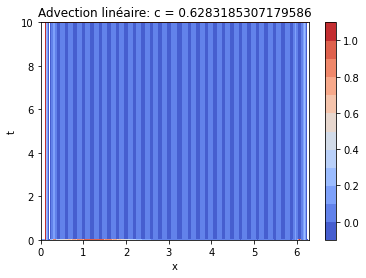

In [9]:
c = (2 * np.pi) / 10 

mu = (2 * np.pi) / 5 
sigma = (2 * np.pi) / 10

x0 = 0 
xN = 2 * np.pi
Nx = 64
dx = (xN - x0) / Nx 

# wave numbers mesh
k = np.arange(-Nx/2, Nx/2, 1) 

x = np.linspace(start=x0, stop=xN, num=Nx) 

t0 = 0
tN = 10
dt = 0.001
Nt = int((tN - t0) / dt)

t = np.linspace(start=t0, stop=tN, num=Nt)

# solution mesh in real space
u = np.ones((Nx, Nt))
# solution mesh in fourier space
u_hat = np.ones((Nx, Nt), dtype="complex")

# initial condition
u0 = np.exp(-((x - mu) ** 2) / (2 * (sigma ** 2)))

# fourier transform of initial condition
u0_hat = (1 / Nx) * np.fft.fftshift(np.fft.fft(u0))

# set initial condition in real and fourier mesh 
u[:,0] = u0
u_hat[:,0] = u0_hat

# forward euler
for j in range(0, Nt-1):
  # compute solution in Fourier space through a finite difference method
  u_hat[:,j+1] = u[:,j] - dt * c * 1j * k * u_hat[:,j]
  # go back in real space 
  u[:,j] = np.real(Nx * np.fft.ifft(np.fft.ifftshift(u_hat[:,j])))
  
fig, ax = plt.subplots()

# get meshgrid
xx, tt = np.meshgrid(x, t)
# plot contour, get colorbar
# use transpose to get t first then x
levels = np.arange(-0.1, 1.1, 0.1)
cs = ax.contourf(xx, tt, u.T, levels, cmap=cm.coolwarm)
# plot colorbar 
plt.colorbar(cs)

ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_title(f"Advection linéaire: c = {c}")